In [1]:
!pip install face_recognition

In [2]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

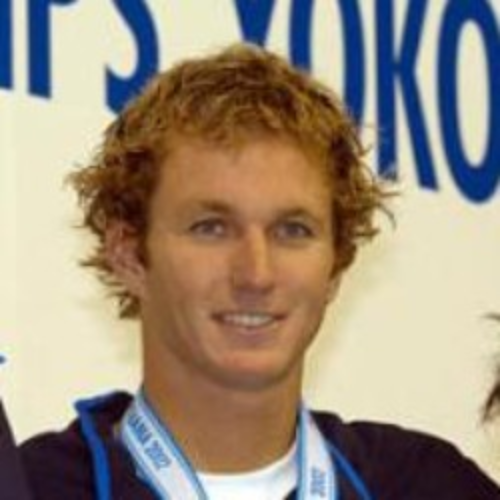

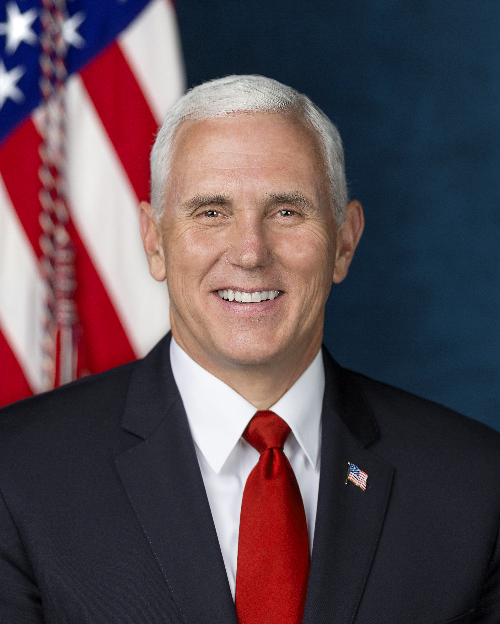

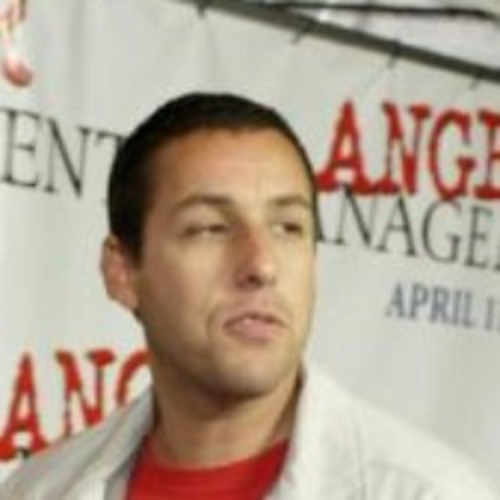

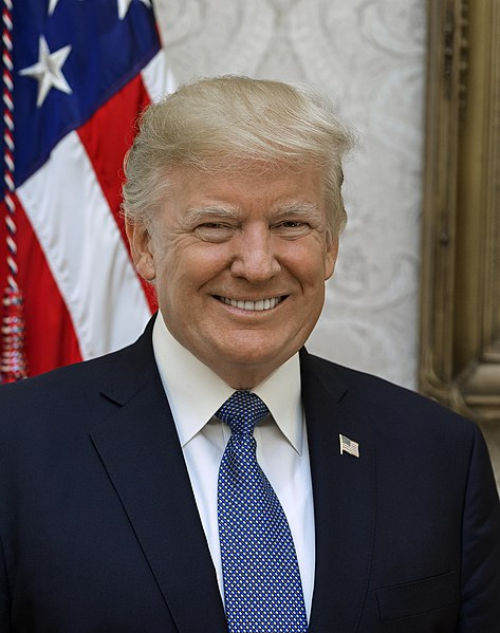

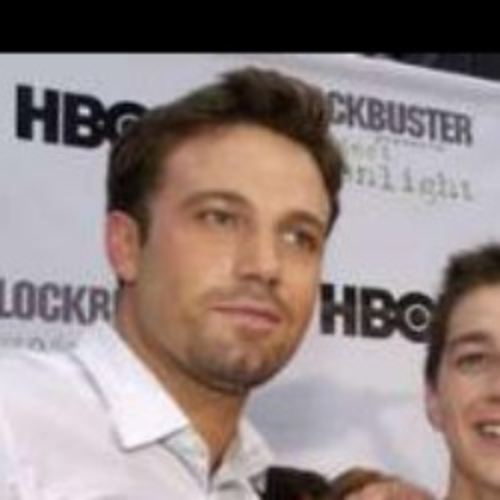

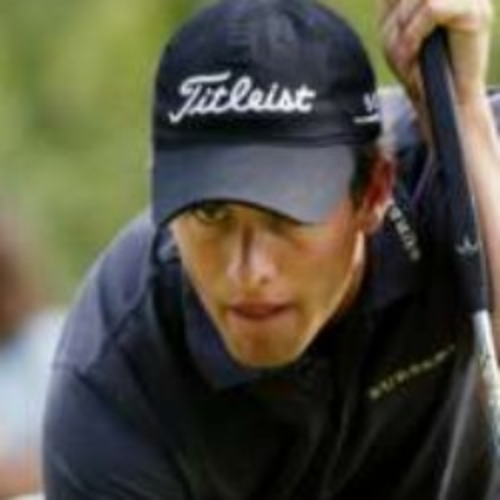

In [3]:
known_encodings = []
known_names = []
known_dir = 'known'
for file in os.listdir(known_dir):
    if file != '.ipynb_checkpoints':
        img = read_img(known_dir + '/' + file)
        img_enc = face_recognition.face_encodings(img)[0]
        known_encodings.append(img_enc)
        known_names.append(file.split('.')[0])
        cv2_imshow(img)

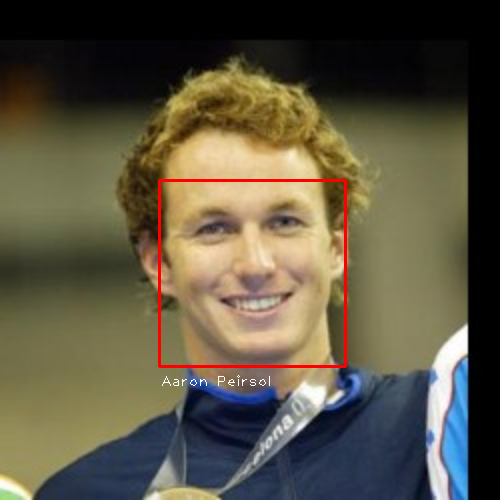

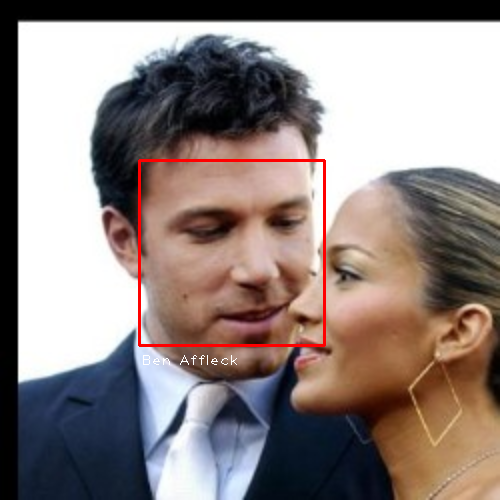

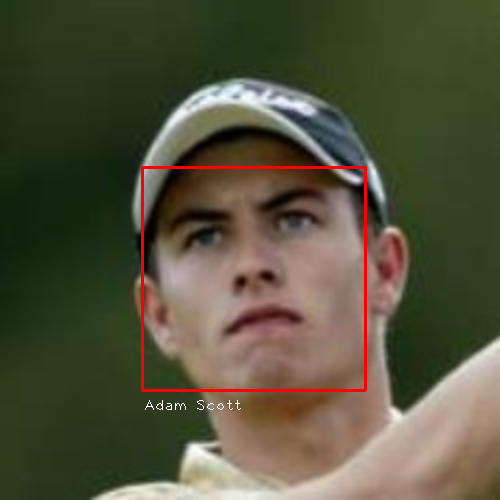

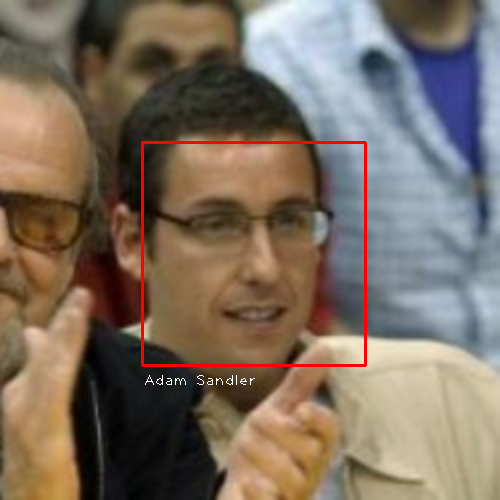

In [4]:
unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    if file != '.ipynb_checkpoints':
        img = read_img(unknown_dir + '/' + file)
        img_enc = face_recognition.face_encodings(img)[0]
        results = face_recognition.compare_faces(known_encodings, img_enc)
        for i in range(len(results)):
            if results[i]:
                name = known_names[i]
                (top, right, bottom, left) = face_recognition.face_locations(img)[0]
                cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
                cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
                cv2_imshow(img)